<a href="https://colab.research.google.com/github/RaymondLeong94/Omdena-Project-2/blob/main/Titles_and_tags_analysis_with_RF_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas and mount drive

import pandas as pd
import json
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
import csv
intial_survey= pd.read_csv('/content/gdrive/MyDrive/GoE/data_7223.csv')

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
offical_titles = pd.read_csv(r'/content/gdrive/MyDrive/GoE/survey_titles (1).csv')
official_demographics_users = pd.read_csv(r'/content/gdrive/MyDrive/GoE/survey_users.csv')

In [6]:
len(intial_survey.columns)

493

In [7]:
#create user titles/demographics df split
survey_users_titles = intial_survey.iloc[:,46:-1].reset_index()
survey_users_demographics = intial_survey.iloc[:,0:45].reset_index()


In [8]:
official_demographics_users.drop(columns = 'timestamp')

UserId                         location  age  gender  \
0        1                New York, NY, USA   31  Female   
1        2                   Miami, FL, USA   58    Male   
2        3                           London   28  Female   
3        4                    Nakuru, Kenya   23    Male   
4        5                  Seattle, WA USA   37  Female   
5        6          Brooklyn, New York, USA   29    Male   
6        7  Navi Mumbai, Maharashtra, India   27    Male   
7        8                  Boston, MA. USA   41    Male   
8        9            Schenectady, NY, USA    24  Female   
9       10        San Jose, California, USA   45  Female   
10      11            Lekki, Lagos, Nigeria   25    Male   
11      12                   Nairobi, Kenya   30  Female   
12      13           Sydney, NSW, Australia   26    Male   
13      14                         Nairobi    30  Female   
14      15   New Brunswick, New Jersey, USA   24    Male   
15      16                             pune   28    Male   
16      17                            India   28    Male   
17      18                          Mumbai    27  Female   
18      19                Ulwe, Navi Mumbai   27    Male   
19      20                             Pune   27    Male   
20      21                            Kenya   33    Male   
21      22    Mumbai, Maharashtra and India   28    Male   
22      23                            Kenya   27    Male   
23      24                 Hamburg, Germany   32  Female   
24      25                   Lagos, Nigeria   33    Male   
25      26                            Thane   28    Male   
26      27                            Miami   52  Female   
27      28                  Kenya, Nairobi    26  Female   
28      29       Mumbai, Maharashtra, India   27  Female   
29      30                         Grimstad   30  Female   
30      31       Douala, Littoral, Cameroon   24  Female   
31      32        Yaounde, Centre, Cameroun   30    Male   
32      33                      Seattle, WA   43    Male   
33      34          Buenos Aires, Argentina   19    Male   
34      35                            Kenya   25    Male   
35      36                   Granada, Spain   44    Male   
36      37                     Switzerland    41    Male   
37      38     Kraków Lesser Poland Poland    21    Male   
38      39                   Kraków, Poland   31  Female   
39      40                               UK   28  Female   
40      41                Funchal, Portugal   34  Female   
41      42     Cracow, Lesserpoland, Poland   27    Male   
42      43                           Cracov   26  Female   
43      44                               UK   23  Female   
44      45                    Krakow Poland   18    Male   
45      46                   United Kingdom   25  Female   
46      47                   Kraków, Polska   28  Female   
47      48      Kraków, małopolskie, Polska   27    Male   
48      49                   Cracow/ Poland   27  Female   
49      50                           London   40    Male   
50      51        Akola, Maharashtra, India   28    Male   
51      52           Cracow, Lesser, Poland   30  Female   
52      53                   Krakow, Poland   25  Female   
53      54           Cochin, Kerala, India    47  Female   
54      55                Dhaka -Bangladesh   27  Female   
55      56            Rajshahi, Bangladesh    29  Female   

                                   cardio_time  \
0               Less than 30 minutes each week   
1              More than 150 minutes each week   
2     30 - 60 minutes (0.5 - 1 hour) each week   
3               Less than 30 minutes each week   
4     30 - 60 minutes (0.5 - 1 hour) each week   
5              More than 150 minutes each week   
6               Less than 30 minutes each week   
7            150 minutes (2.5 hours) each week   
8            150 minutes (2.5 hours) each week   
9               Less than 30 minutes each week   
10              Less than 30 minu

In [9]:
intial_survey

Timestamp  \
0    2023/05/30 3:51:15 PM AST   
1   2023/06/21 11:18:09 AM AST   
2   2023/06/21 12:50:34 PM AST   
3    2023/06/21 1:47:39 PM AST   
4    2023/06/21 2:51:14 PM AST   
5    2023/06/21 4:48:28 PM AST   
6   2023/06/23 10:54:49 AM AST   
7   2023/06/23 11:55:25 AM AST   
8   2023/06/23 12:25:24 PM AST   
9    2023/06/23 5:08:11 PM AST   
10  2023/06/23 10:52:54 PM AST   
11   2023/06/24 2:05:51 PM AST   
12   2023/06/24 4:15:44 PM AST   
13   2023/06/24 7:08:50 PM AST   
14   2023/06/25 1:04:38 AM AST   
15   2023/06/25 1:14:37 AM AST   
16   2023/06/25 1:22:59 AM AST   
17   2023/06/25 1:23:57 AM AST   
18   2023/06/25 1:29:23 AM AST   
19   2023/06/25 3:00:54 AM AST   
20   2023/06/25 3:28:19 AM AST   
21   2023/06/25 4:00:00 AM AST   
22   2023/06/25 6:06:56 AM AST   
23   2023/06/25 6:10:22 AM AST   
24   2023/06/25 9:46:19 AM AST   
25   2023/06/25 9:51:24 AM AST   
26   2023/06/25 9:54:37 AM AST   
27  2023/06/25 10:46:40 AM AST   
28   2023/06/25 2:02:43 PM AST   
29   2023/06/26 6:52:44 AM AST   
30   2023/06/26 7:42:51 AM AST   
31  2023/06/26 10:18:10 AM AST   
32  2023/06/26 11:47:33 AM AST   
33   2023/06/26 3:11:41 PM AST   
34   2023/06/26 4:38:46 PM AST   
35   2023/06/27 9:37:01 AM AST   
36  2023/06/27 12:58:13 PM AST   
37   2023/06/28 3:48:21 AM AST   
38   2023/06/28 4:42:38 AM AST   
39   2023/06/28 4:44:05 AM AST   
40   2023/06/28 4:54:30 AM AST   
41   2023/06/28 5:13:19 AM AST   
42   2023/06/28 5:50:52 AM AST   
43   2023/06/28 5:56:43 AM AST   
44   2023/06/28 5:58:35 AM AST   
45   2023/06/28 6:09:09 AM AST   
46   2023/06/28 6:28:50 AM AST   
47   2023/06/28 6:39:23 AM AST   
48   2023/06/28 6:59:24 AM AST   
49   2023/06/28 7:50:25 AM AST   
50   2023/06/29 4:04:07 AM AST   
51  2023/06/29 11:10:47 AM AST   
52   2023/06/30 3:07:56 AM AST   
53   2023/06/30 6:32:17 AM AST   
54   2023/06/30 8:22:18 AM AST   
55   2023/07/02 2:32:03 AM AST   
56   2023/07/02 4:22:51 AM AST   

   Please enter your city, state/province, and country.  \
0                                                 NaN     
1                                   New York, NY, USA     
2                                      Miami, FL, USA     
3                                              London     
4                                       Nakuru, Kenya     
5                                     Seattle, WA USA     
6                             Brooklyn, New York, USA     
7                     Navi Mumbai, Maharashtra, India     
8                                     Boston, MA. USA     
9                               Schenectady, NY, USA      
10                          San Jose, California, USA     
11                              Lekki, Lagos, Nigeria     
12                                     Nairobi, Kenya     
13                             Sydney, NSW, Australia     
14                                           Nairobi      
15                     New Brunswick, New Jersey, USA     
16                                               pune     
17                                              India     
18                                            Mumbai      
19                                  Ulwe, Navi Mumbai     
20                                               Pune     
21                                              Kenya     
22                      Mumbai, Maharashtra and India     
23                                              Kenya     
24                                   Hamburg, Germany     
25                                     Lagos, Nigeria     
26                                              Thane     
27                                              Miami     
28                                    Kenya, Nairobi      
29                         Mumbai, Maharashtra, India     
30                                           Grimstad     
31                         Douala, Littoral, Cameroon     
32                          Yaounde, Centre, Cameroun     
33                                        

In [10]:
#merge
offical_titles.Pillar.value_counts()

Rest              92
Active            91
Nutrition         34
Beauty            27
Beauty, Rest       8
Beauty, Active     7
Name: Pillar, dtype: int64

In [11]:
#not dealing with double pillars rn
dropme1 = offical_titles[offical_titles['Pillar'] == "Beauty, Rest"]
dropme2 = offical_titles[offical_titles['Pillar'] == "Beauty, Active"]


In [12]:
offical_titles.drop(dropme1.index, inplace=True)
offical_titles.drop(dropme2.index, inplace=True)


In [13]:
offical_titles.head()

Id                                               Name     Pillar  GoeId  \
0   0  000 - Video: Side Plank Pulse - Core Library |...     Active  206.0   
1   1            001 - Video: Passionate, Feminine Dance     Active  297.0   
2   2  002 - Video: Low Lunge - Yoga Library | Beginn...       Rest   41.0   
3   3  003 - Text, Video: Understanding Macronutrient...  Nutrition  314.0   
4   4  004 - Video: Wide Squat Pulse - Bodyweight Lib...     Active  225.0   

                                      GoeTitle                 Categories  \
0        Side\ plank\ pulse\ \-\ core\ library  Get to know the technique   
1                 Passionate,\ Feminine\ dance         Dance and aerobics   
2                Low\ lunge\ \-\ yoga\ library  Get to know the technique   
3                Understanding\ macronutrients                  Education   
4  Wide\ squat\ pulse\ \-\ bodyweight\ library  Get to know the technique   

                                              Series    Difficulty  \
0                             core exercises library      Beginner   
1  dance away the stress, cardio dance, dance and...      Beginner   
2                                 yoga poses library      Beginner   
3                                          Education  Intermediate   
4                       bodyweight exercises library      Beginner   

   Difficulty_Num         Duration  Duration_Num Require_Movement  \
0             1.0  <1 min (shorts)           0.0              Yes   
1             1.0         6-15 min           3.0              Yes   
2             1.0  <1 min (shorts)           0.0               No   
3             2.0         6-15 min           3.0               no   
4             1.0  <1 min (shorts)           0.0              Yes   

   Require_Movement_Num                                               Tags  \
0                   1.0                            Core, Body weight, Core   
1                   1.0  Flexibility, Stress, Body positive, Dance card...   
2                   0.0                            Yoga, Yoga, Body weight   
3                   0.0                        Nutrition, Health, Wellness   
4                   1.0  Body weight, Library, Body weight exercises li...   

   Source         Type  Audio  Recepie  Text  Video  Visualization  Active  \
0    Real        Video      0        0     0      1              0       1   
1    Real        Video      0        0     0      1              0       1   
2    Real        Video      0        0     0      1              0       0   
3  Mockup  Text, Video      0        0     1      1              0       0   
4    Real        Video      0        0     0      1              0       1   

   Beauty  Nutrition  Rest  
0       0          0     0  
1       0          0     0  
2       0          0     1  
3       0          1     0  
4       0          0     0

In [14]:

offical_titles['Tags'] = offical_titles['Tags'].astype(str)
encoded_tags = offical_titles['Tags'].str.get_dummies(sep=',')

# Concatenate the encoded tags with the original DataFrame
offical_titles = pd.concat([offical_titles, encoded_tags], axis=1)






In [15]:
official_titles_RF_model = offical_titles.drop(columns = ['Name', 'GoeId', 'GoeTitle', 'Categories', 'Series', 'Difficulty', 'Duration', 'Require_Movement', 'Tags', 'Source', 'Type'])

In [16]:
official_titles_RF_model= official_titles_RF_model.drop(columns = ['None','None?', 'nan'])


In [17]:
official_titles_RF_model = official_titles_RF_model.drop(columns = ["Id"])


In [18]:
official_titles_RF_model.isna().sum().sort_values(ascending=False)


Difficulty_Num          9
Require_Movement_Num    9
Duration_Num            7
 Thai stretch           0
 Self-esteem            0
                       ..
 Fostering              0
 Gluten free            0
 Growth                 0
 Guide                  0
Yoga                    0
Length: 162, dtype: int64

In [19]:
official_titles_RF_model.isna().sum().sort_values(ascending=False)

Difficulty_Num          9
Require_Movement_Num    9
Duration_Num            7
 Thai stretch           0
 Self-esteem            0
                       ..
 Fostering              0
 Gluten free            0
 Growth                 0
 Guide                  0
Yoga                    0
Length: 162, dtype: int64

In [20]:
official_titles_RF_model.fillna(0, inplace=True)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = official_titles_RF_model.drop('Pillar', axis=1)
y = official_titles_RF_model['Pillar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)



In [22]:
accuracy

0.9508196721311475

In [23]:
official_titles_RF_model2 = official_titles_RF_model.copy()

In [24]:
#reset the pillars
#hypothesis: activity = rest and nutrition = beauty


# Create a dictionary for value replacement
replacement_dict = {
    'Rest': 'Activity',
    'Beauty': 'Nutrition'
}

replace_func = lambda x: x.replace('Beauty', 'Nutrition').replace('Rest', 'Active')


# Apply the value replacement function to each row in the DataFrame
official_titles_RF_model['Pillar']= official_titles_RF_model['Pillar'].map(replace_func)



In [25]:
replace_func = lambda x: x.replace('Nutrition', "1").replace('Active', "0")


# Apply the value replacement function to each row in the DataFrame
official_titles_RF_model['Pillar']= official_titles_RF_model['Pillar'].map(replace_func)

In [26]:
official_titles_RF_model['Pillar']= official_titles_RF_model['Pillar'].astype(int)

In [27]:
X= None
y=None

X = official_titles_RF_model.drop('Pillar', axis=1)
y = official_titles_RF_model['Pillar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [28]:
!pip install optuna

In [29]:
from optuna.samplers import TPESampler
import optuna
from sklearn.metrics import accuracy_score, roc_curve, auc #metric

def objective(trial):
    rf_params = {
        'criterion':  trial.suggest_categorical('criterion',['entropy']),
        'min_samples_split':        trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 10, 46),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    }

    rf = RandomForestClassifier(**rf_params)
    X= None
    y= None

    X = official_titles_RF_model.drop('Pillar', axis=1)
    y = official_titles_RF_model['Pillar']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc
#https://optuna.readthedocs.io/en/stable/reference/generated/optuna.create_study.html
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=20)

[I 2023-07-11 02:46:54,681] A new study created in memory with name: no-name-6c789d32-f867-4e79-b15b-742f9d784efd
[I 2023-07-11 02:46:54,750] Trial 0 finished with value: 0.9821428571428572 and parameters: {'criterion': 'entropy', 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 11, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.9821428571428572.
[I 2023-07-11 02:46:54,787] Trial 1 finished with value: 0.9821428571428572 and parameters: {'criterion': 'entropy', 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 42, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.9821428571428572.
[I 2023-07-11 02:46:54,854] Trial 2 finished with value: 0.9821428571428572 and parameters: {'criterion': 'entropy', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 15, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.9821428571428572.
[I 2023-07-11 02:46:54,917] Trial 3 finished with value: 0.9821428571428

In [30]:
!pip install shap

In [31]:
import shap
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)


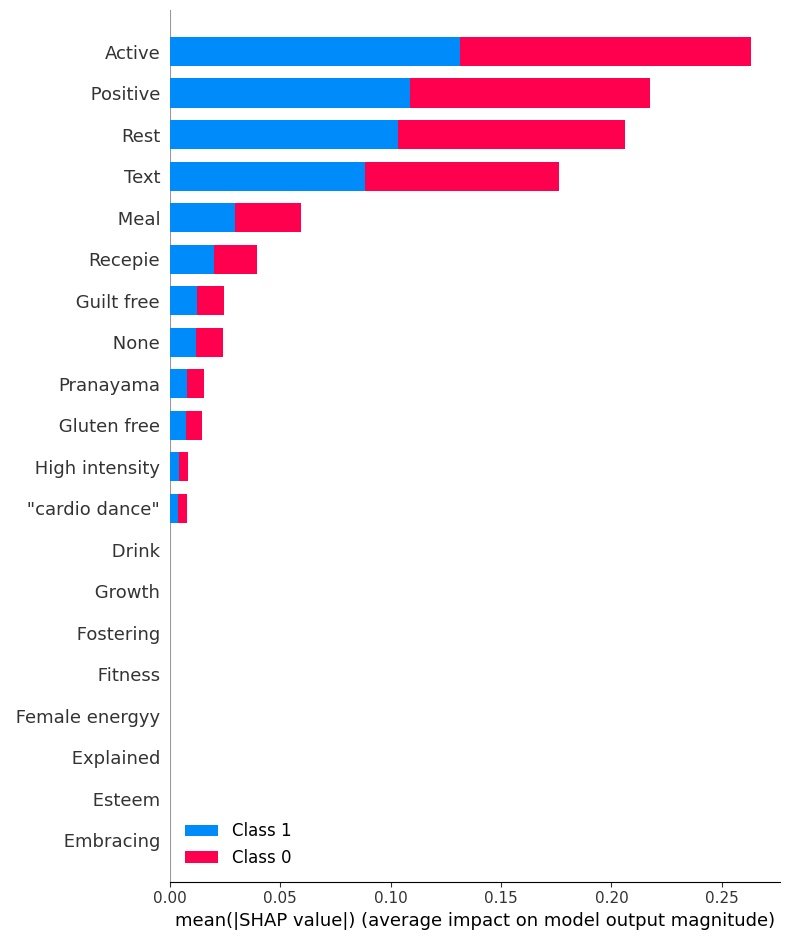

In [32]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [33]:
official_titles_RF_model

Pillar  Difficulty_Num  Duration_Num  Require_Movement_Num  Audio  \
0         0             1.0           0.0                   1.0      0   
1         0             1.0           3.0                   1.0      0   
2         0             1.0           0.0                   0.0      0   
3         1             2.0           3.0                   0.0      0   
4         0             1.0           0.0                   1.0      0   
..      ...             ...           ...                   ...    ...   
254       1             1.0           3.0                   0.0      0   
255       0             2.0           3.0                   1.0      0   
256       0             1.0           3.0                   0.0      0   
257       0             1.0           0.0                   1.0      0   
258       1             1.0           0.0                   0.0      1   

     Recepie  Text  Video  Visualization  Active  Beauty  Nutrition  Rest  \
0          0     0      1              0       1       0          0     0   
1          0     0      1              0       1       0          0     0   
2          0     0      1              0       0       0          0     1   
3          0     1      1              0       0       0          1     0   
4          0     0      1              0       1       0          0     0   
..       ...   ...    ...            ...     ...     ...        ...   ...   
254        1     0      1              0       0       0          1     0   
255        0     0      1              0       1       0          0     0   
256        0     0      1              0       0       0          0     1   
257        0     0      1              0       1       0          0     0   
258        0     1      0              0       0       1          0     0   

      "cardio dance"   "dance and take care of your figure"  \
0                  0                                      0   
1                  1                                      1   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   
..               ...                                    ...   
254                0                                      0   
255                0                                      0   
256                0                                      0   
257                0                                      0   
258                0                                      0   

      "dance and take care of yourself" )   Affirmation   Art   Baking  \
0                                       0             0     0        0   
1                                       1             0     0        0   
2                                       0             0     0        0   
3                                       0             0     0        0   
4                                       0             0     0        0   
..                                    ...           ...   ...      ...   
254                                     0             0     0        0   
255                                     0             0     0        0   
256                                     0             0     0        0   
257                                     0             0     0        0   
258                                     0             0     0        0   

      Balance   Balance diet   Begin   Benefits   Body positive   Body weight  \
0           0              0       0          0               0             1   
1           0              0       0          0               1             0   
2           0              0       0          0               0             1   
3           0              0       0          0               0             0   
4           0              0       0          0               0             0   
..        ...            ...     ...        ...            

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X= None
y= None

X = official_titles_RF_model.drop('Pillar', axis=1)
y = official_titles_RF_model['Pillar']

# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_matrix, y, test_size=0.5, random_state=42)

# Step 3: Apply PCA to the preprocessed data
pca = PCA(n_components=2)  # Set the desired number of components (k)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train a classifier on the reduced dimensionality data
rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca, y_train)

# Step 5: Make predictions on the testing set
y_pred = rf_model.predict(X_test_pca)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy:', accuracy)
print('AUC:', roc_auc)


Accuracy: 0.9836065573770492
AUC: 0.9642857142857143


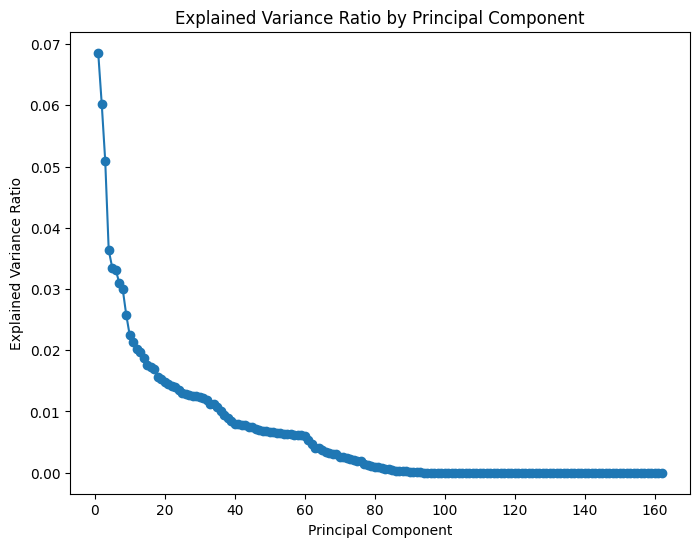

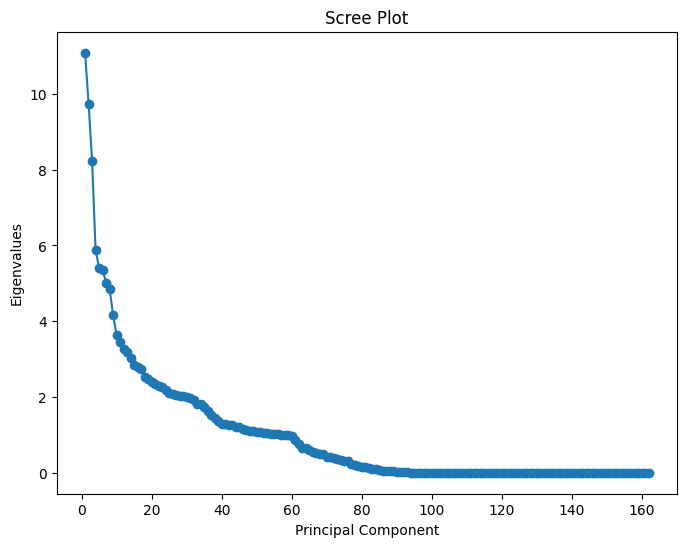

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(official_titles_RF_model)

# Step 2: Apply PCA to the preprocessed data
pca = PCA()
pca.fit(scaled_data)

# Step 3: Visualize the explained variance ratio and scree plot
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Plotting scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()


In [36]:
official_titles_RF_model

Pillar  Difficulty_Num  Duration_Num  Require_Movement_Num  Audio  \
0         0             1.0           0.0                   1.0      0   
1         0             1.0           3.0                   1.0      0   
2         0             1.0           0.0                   0.0      0   
3         1             2.0           3.0                   0.0      0   
4         0             1.0           0.0                   1.0      0   
..      ...             ...           ...                   ...    ...   
254       1             1.0           3.0                   0.0      0   
255       0             2.0           3.0                   1.0      0   
256       0             1.0           3.0                   0.0      0   
257       0             1.0           0.0                   1.0      0   
258       1             1.0           0.0                   0.0      1   

     Recepie  Text  Video  Visualization  Active  Beauty  Nutrition  Rest  \
0          0     0      1              0       1       0          0     0   
1          0     0      1              0       1       0          0     0   
2          0     0      1              0       0       0          0     1   
3          0     1      1              0       0       0          1     0   
4          0     0      1              0       1       0          0     0   
..       ...   ...    ...            ...     ...     ...        ...   ...   
254        1     0      1              0       0       0          1     0   
255        0     0      1              0       1       0          0     0   
256        0     0      1              0       0       0          0     1   
257        0     0      1              0       1       0          0     0   
258        0     1      0              0       0       1          0     0   

      "cardio dance"   "dance and take care of your figure"  \
0                  0                                      0   
1                  1                                      1   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   
..               ...                                    ...   
254                0                                      0   
255                0                                      0   
256                0                                      0   
257                0                                      0   
258                0                                      0   

      "dance and take care of yourself" )   Affirmation   Art   Baking  \
0                                       0             0     0        0   
1                                       1             0     0        0   
2                                       0             0     0        0   
3                                       0             0     0        0   
4                                       0             0     0        0   
..                                    ...           ...   ...      ...   
254                                     0             0     0        0   
255                                     0             0     0        0   
256                                     0             0     0        0   
257                                     0             0     0        0   
258                                     0             0     0        0   

      Balance   Balance diet   Begin   Benefits   Body positive   Body weight  \
0           0              0       0          0               0             1   
1           0              0       0          0               1             0   
2           0              0       0          0               0             1   
3           0              0       0          0               0             0   
4           0              0       0          0               0             0   
..        ...            ...     ...        ...            

In [37]:


replace_func = lambda x: x.replace('Nutrition', 'Beauty').replace('Active', 'Rest')


# Apply the value replacement function to each row in the DataFrame
official_titles_RF_model2['Pillar']= official_titles_RF_model2['Pillar'].map(replace_func)



In [38]:
replace_func = lambda x: x.replace('Beauty', "1").replace('Rest', "0")


# Apply the value replacement function to each row in the DataFrame
official_titles_RF_model2['Pillar']= official_titles_RF_model2['Pillar'].map(replace_func)

In [39]:
official_titles_RF_model2['Pillar']= official_titles_RF_model2['Pillar'].astype(int)

In [40]:
X= None
y=None

X = official_titles_RF_model2.drop('Pillar', axis=1)
y = official_titles_RF_model2['Pillar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


In [41]:
accuracy

0.9918032786885246

In [42]:
from optuna.samplers import TPESampler
import optuna
from sklearn.metrics import accuracy_score, roc_curve, auc #metric

def objective(trial):
    rf_params = {
        'criterion':  trial.suggest_categorical('criterion',['entropy']),
        'min_samples_split':        trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 10, 46),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    }

    rf = RandomForestClassifier(**rf_params)
    X= None
    y= None

    X = official_titles_RF_model2.drop('Pillar', axis=1)
    y = official_titles_RF_model2['Pillar']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc
#https://optuna.readthedocs.io/en/stable/reference/generated/optuna.create_study.html
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=20)

[I 2023-07-11 02:47:13,841] A new study created in memory with name: no-name-c73340c7-61d6-43e3-9abc-d99d93237760
[I 2023-07-11 02:47:13,869] Trial 0 finished with value: 0.9821428571428572 and parameters: {'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 38, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9821428571428572.
[I 2023-07-11 02:47:13,892] Trial 1 finished with value: 0.9821428571428572 and parameters: {'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 34, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9821428571428572.
[I 2023-07-11 02:47:13,912] Trial 2 finished with value: 0.9821428571428572 and parameters: {'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 27, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.9821428571428572.
[I 2023-07-11 02:47:13,930] Trial 3 finished with value: 0.9821428571428572 and parameters: {

In [43]:
explainer = None
shap_values = None
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)

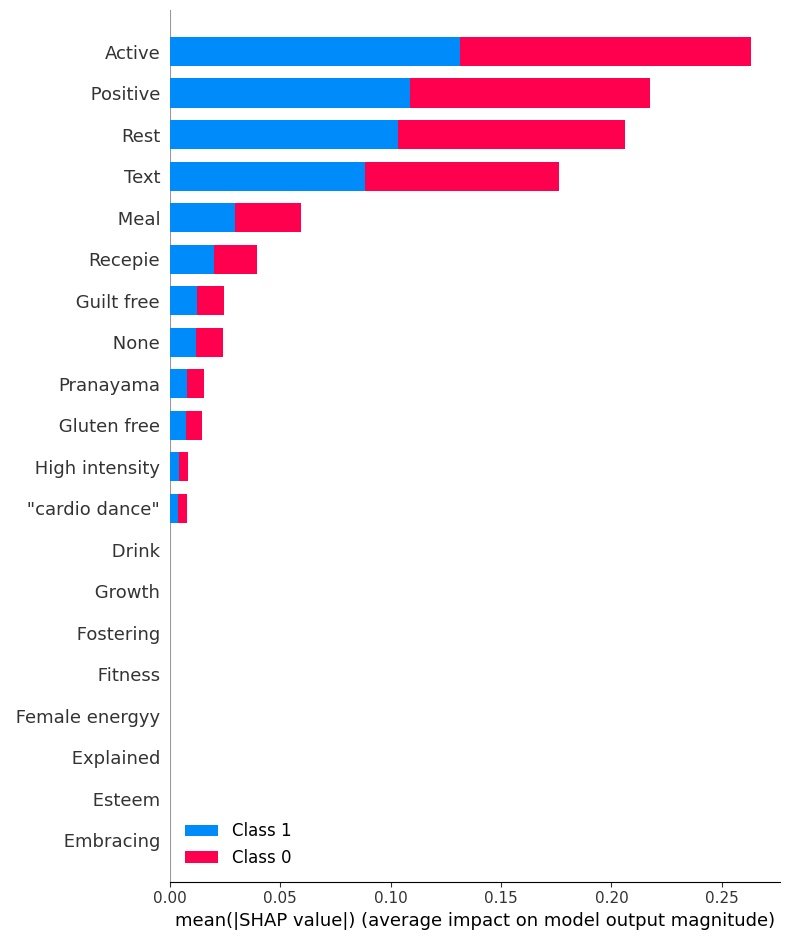

In [44]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X= None
y= None

X = official_titles_RF_model2.drop('Pillar', axis=1)
y = official_titles_RF_model2['Pillar']

# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_matrix, y, test_size=0.5, random_state=42)

# Step 3: Apply PCA to the preprocessed data
pca = PCA(n_components=2)  # Set the desired number of components (k)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train a classifier on the reduced dimensionality data
rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca, y_train)

# Step 5: Make predictions on the testing set
y_pred = rf_model.predict(X_test_pca)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy:', accuracy)
print('AUC:', roc_auc)


Accuracy: 0.9836065573770492
AUC: 0.9642857142857143


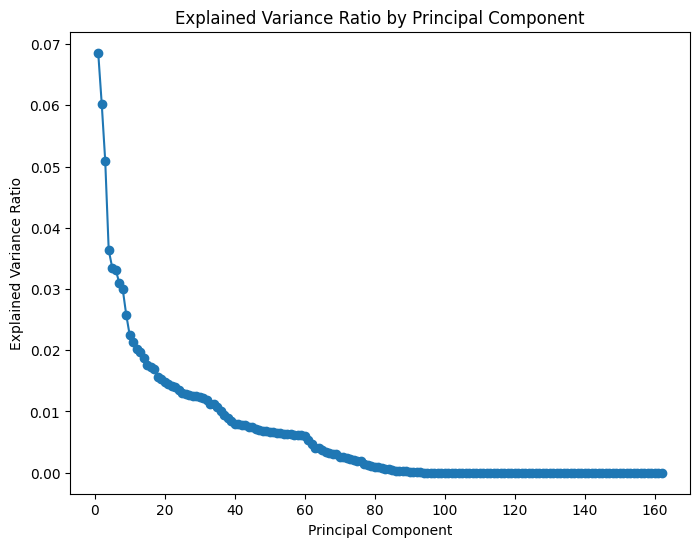

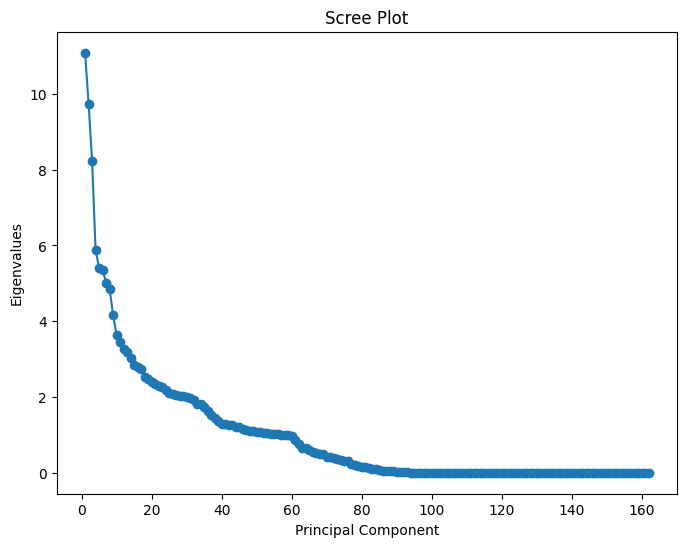

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(official_titles_RF_model)

# Step 2: Apply PCA to the preprocessed data
pca = PCA()
pca.fit(scaled_data)

# Step 3: Visualize the explained variance ratio and scree plot
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Plotting scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()
